In [55]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

# Завантаження та підготовка даних
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Нормалізація значень пікселів до проміжку [0, 1]
y_train = to_categorical(y_train, num_classes=10)  # Перетворення y_train на one-hot вектори
y_test_h = to_categorical(y_test, num_classes=10)    # Перетворення y_test на one-hot вектори

y_test  # y_test: Тестові мітки. Це масив, що містить відповідні мітки для тестових зображень

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7838 - loss: 0.7454 - val_accuracy: 0.9392 - val_loss: 0.1981
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9486 - loss: 0.1743 - val_accuracy: 0.9592 - val_loss: 0.1304
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9658 - loss: 0.1147 - val_accuracy: 0.9667 - val_loss: 0.1096
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9741 - loss: 0.0847 - val_accuracy: 0.9725 - val_loss: 0.0894
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9814 - loss: 0.0616 - val_accuracy: 0.9742 - val_loss: 0.0827
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9855 - loss: 0.0484 - val_accuracy: 0.9762 - val_loss: 0.0823
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9872 - loss: 0.0400 - val_accuracy: 0.9769 - val_loss: 0.0807
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9910 - loss: 0.0296 - 

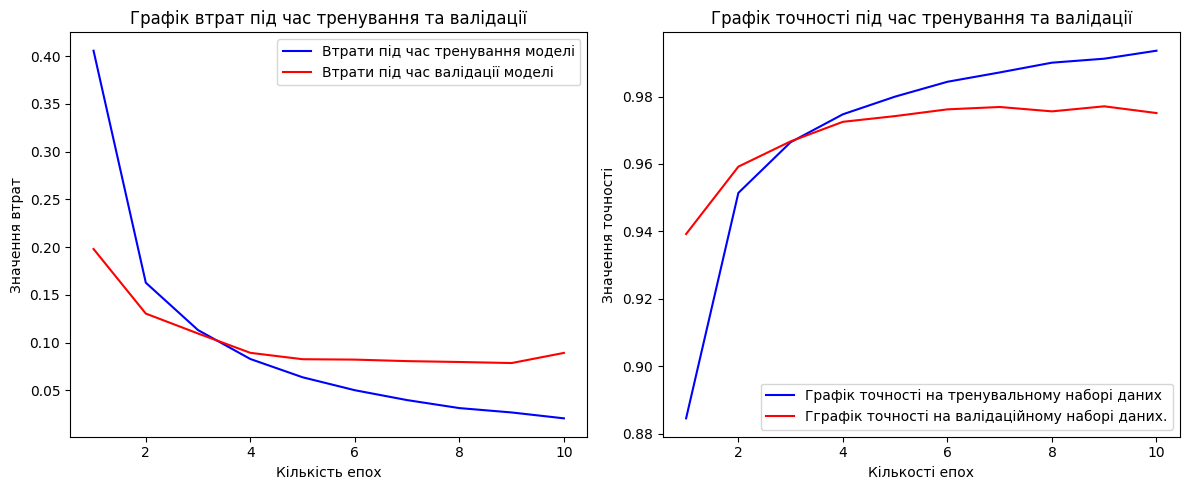

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9705 - loss: 0.1057
Test Accuracy: 0.9750999808311462


In [57]:
# Побудова моделі
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Вхідний шар - розгорнутий вхідний зображення розміром 28x28 в вектор розміром 784
    tf.keras.layers.Dense(128, activation='sigmoid'),  # Перший прихований шар з 128 нейронами та активаційною функцією sigmoid
    tf.keras.layers.Dense(256, activation='sigmoid'),  # Другий прихований шар з 256 нейронами та активаційною функцією sigmoid
    tf.keras.layers.Dense(10, activation='softmax')  # Вихідний шар з 10 нейронами та активаційною функцією softmax
])

# Компіляція моделі
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Функція втрат - крос-ентропія
              metrics=['accuracy'])             # Метрика - точність

# Навчання моделі
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test_h))

# Отримання історії точності та втрат
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Побудова графіків
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Втрати під час тренування моделі')
plt.plot(epochs, val_loss, 'r', label='Втрати під час валідації моделі')
plt.title('Графік втрат під час тренування та валідації')
plt.xlabel('Кількість епох')
plt.ylabel('Значення втрат')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b', label='Графік точності на тренувальному наборі даних')
plt.plot(epochs, val_accuracy, 'r', label='Гграфік точності на валідаційному наборі даних.')
plt.title('Графік точності під час тренування та валідації')
plt.xlabel('Кількості епох')
plt.ylabel('Значення точності')
plt.legend()

plt.tight_layout()
plt.show()

#Якщо все зроблено правильно, то точність повинна зростати, а втрати зменшуватись

# Оцінка якості моделі на тестових даних
test_loss, test_acc = model.evaluate(x_test, y_test_h)
print(f"Test Accuracy: {test_acc}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
labels.shape (15, 10)


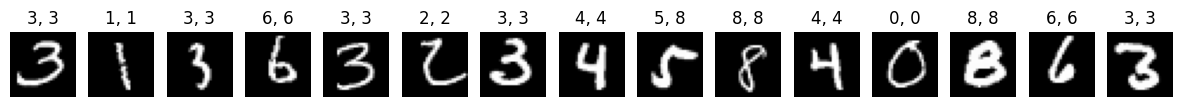

In [58]:
import matplotlib.pyplot as plt
import numpy as np
#Випадковий вибір 15 зображень з тестового набору даних
num_images = 15
random_indexes = np.random.randint(0, len(x_test), num_images)
images = x_test[random_indexes]
labels = y_test_h[random_indexes]


# Передбачення для вибраних зображень
predictions = model.predict(images)

# Виведення результатів
#for i in range(num_images):
#    plt.imshow(images[i], cmap='gray')
#    plt.axis('off')
#    true_label = np.argmax(labels[i])
#   predicted_label = np.argmax(predictions[i])
#    plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label}")
#    plt.show()

plt.figure(figsize=(15, 1))
for i in range(15):
    plt.subplot(1, 15, i+1)
    plt.imshow(images[i], cmap='gray')
    true_label = np.argmax(labels[i])
    predicted_label = np.argmax(predictions[i])
    plt.title(f"{true_label}, {predicted_label}")
    plt.axis('off')

print("labels.shape", labels.shape)

In [59]:
labels

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

In [60]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [61]:
random_indexes

array([7193, 5998, 1607, 2160, 1284, 3384, 8867, 3025, 3855, 1877,  295,
        586, 4724, 7343, 9163])

In [62]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

print(labels.shape)
print(random_indexes.shape)

# Отримати передбачення для тестових даних
y_pred = model.predict(x_test)

# Отримати індекс класу з найбільшою ймовірністю для кожного прикладу
y_pred_classes = np.argmax(y_pred, axis=1)

# Вивести звіт про класифікацію
print(classification_report(y_test, y_pred_classes))

(15, 10)
(15,)
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.98      0.97      0.98      1010
           4       0.97      0.98      0.97       982
           5       0.99      0.96      0.97       892
           6       0.99      0.97      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.96      0.97      0.97       974
           9       0.96      0.97      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.97      0.97     10000
weighted avg       0.98      0.98      0.98     10000



Точність (recision) – це відношення правильно передбачених позитивних спостережень до загальної кількості прогнозованих позитивних результатів. У такому налаштуванні кількох класів, як це, це відношення правильно передбачених екземплярів класу до загальної кількості екземплярів, передбачених як цей клас. Наприклад, для класу 0 97% випадків, передбачених як клас 0, насправді були класом 0.

Повнота (recall) – це відношення правильно передбачених позитивних спостережень до всіх фактичних позитивних результатів. У мультикласі це відношення правильно передбачених екземплярів класу до всіх екземплярів, які насправді є цим класом. Наприклад, для класу 0 99% випадків, які насправді були класом 0, були правильно передбачені.

F1-оцінка: F1-оцінка є гармонійним середнім показником точності та повнотою.

Підтримка: підтримка — це кількість фактичних входжень класу у вказаному наборі даних. В даній задачі - це кількість екземплярів кожного класу у тестовому наборі.

Точність моделі (accuracy) – це відношення правильно передбачених спостережень до загальної кількості спостережень. У багатокласовій класифікації це відношення правильно передбачених екземплярів для всіх класів до загальної кількості екземплярів. В нашому випадку точність складає 98%.

Macro avg: - це середнє значення точності, запам’ятовування та оцінки F1 для всіх класів. Він надає однакову вагу кожному класу, незалежно від його розміру.

Середнє зважене значення: це середньозважене значення точності, повноти та оцінки F1, де оцінка кожного класу зважується за його підтримкою (кількістю справжніх випадків). Це надає більше значення оцінки моделі на великих класах.

Загалом отримана модель, здається, працює дуже добре, з високою точністю, повнотою і результатами F1 практичнона класах, що призводить до високої загальних оцінок (не менше 97%).